In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.RedDotsData import RedDotsData
from lib.FolderStructure import FolderStructure


#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
#videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"


rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
#videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
videoFileName = "V1_R_20180911_165259"

folderStruct = FolderStructure(rootDir, videoFileName)


rdd = RedDotsData(folderStruct) #.getRedDotsFilepath())
rdd.getCount()

46

In [2]:
redDots = rdd.interpolated()
#redDots.head(5)

In [3]:
column_names = ['dir','filename','frameID','createdOn','crabNumber',"crabWidthPixels","crabLocationX", 'crabLocationY',
                'crabCoordinatePoint','cranbCoordinateBox']
crabsDF = pd.read_csv(folderStruct.getCrabsFilepath(),delimiter="\t",na_values="(null)",names = column_names) # 24 errors
#crabsDF.head(10)

In [4]:
res=pd.merge(crabsDF[['dir','filename','frameID',"crabWidthPixels","crabLocationX", 'crabLocationY']], 
             redDots[['frameNumber','mm_per_pixel']],left_on=['frameID'], right_on= ['frameNumber'],how='left')
res["crabWidthMM"]=res["crabWidthPixels"] * res["mm_per_pixel"] 
res.head(10)

,dir,filename,frameID,crabWidthPixels,crabLocationX,crabLocationY,frameNumber,mm_per_pixel,crabWidthMM
0,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000645.jpg,657,48.414874,1027,553,NaN,NaN,NaN
1,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000645.jpg,645,30.413813,286,875,NaN,NaN,NaN
2,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame005715.jpg,5715,29.966648,1028,903,5715.0,0.632290,18.947600
3,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame005715.jpg,5723,32.015621,386,979,5723.0,0.633045,20.267316
4,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000254.jpg,254,27.459060,795,380,NaN,NaN,NaN
5,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame009981.jpg,10026,33.015148,221,368,10026.0,0.720206,23.777715
6,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame010243.jpg,10243,23.409400,865,304,10243.0,0.629422,14.734403
7,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,645,26.248809,288,873,NaN,NaN,NaN
8,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,10530,31.144823,101,420,10530.0,0.536954,16.723339
9,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,500,37.336309,456,81,NaN,NaN,NaN


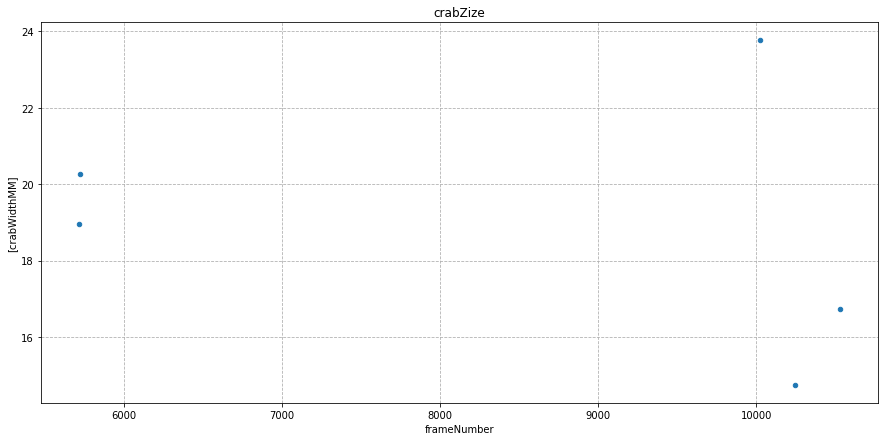

In [5]:
res.plot.scatter(x='frameNumber', y=['crabWidthMM'],figsize=(15,7), title="crabZize")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines